<a href="https://colab.research.google.com/github/PrakharAgrawal031/Medicinal-Plant-Identificaton-SmartIndiaHackathon/blob/main/Medicinal_Plant_Identification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
image_width = 450
image_height = 600
batch = 32
channels = 3
train_size = 0.8
test_size = 0.1

In [ ]:
leafs_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset", shuffle=True, image_size=(image_width,image_height), batch_size=batch)

Found 6900 files belonging to 80 classes.


In [ ]:
leafs_classes= leafs_dataset.class_names
leafs_classes

['Aloevera',
 'Amla',
 'Amruthaballi',
 'Arali',
 'Astma_weed',
 'Badipala',
 'Balloon_Vine',
 'Bamboo',
 'Beans',
 'Betel',
 'Bhrami',
 'Bringaraja',
 'Caricature',
 'Castor',
 'Catharanthus',
 'Chakte',
 'Chilly',
 'Citron lime (herelikai)',
 'Coffee',
 'Common rue(naagdalli)',
 'Coriender',
 'Curry',
 'Doddpathre',
 'Drumstick',
 'Ekka',
 'Eucalyptus',
 'Ganigale',
 'Ganike',
 'Gasagase',
 'Ginger',
 'Globe Amarnath',
 'Guava',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jackfruit',
 'Jasmine',
 'Kambajala',
 'Kasambruga',
 'Kohlrabi',
 'Lantana',
 'Lemon',
 'Lemongrass',
 'Malabar_Nut',
 'Malabar_Spinach',
 'Mango',
 'Marigold',
 'Mint',
 'Neem',
 'Nelavembu',
 'Nerale',
 'Nooni',
 'Onion',
 'Padri',
 'Palak(Spinach)',
 'Papaya',
 'Parijatha',
 'Pea',
 'Pepper',
 'Pomoegranate',
 'Pumpkin',
 'Raddish',
 'Rose',
 'Sampige',
 'Sapota',
 'Seethaashoka',
 'Seethapala',
 'Spinach1',
 'Tamarind',
 'Taro',
 'Tecoma',
 'Thumbe',
 'Tomato',
 'Tulsi',
 'Turmeric',
 'ashoka',
 'camphor',
 

(32, 450, 600, 3)
[34 47 39 71  7 31 39 40 25 15  4 21 49 68  9 42 55 60 64 39 25 46 24 20
 23 10 13 18 64 28 69 35]


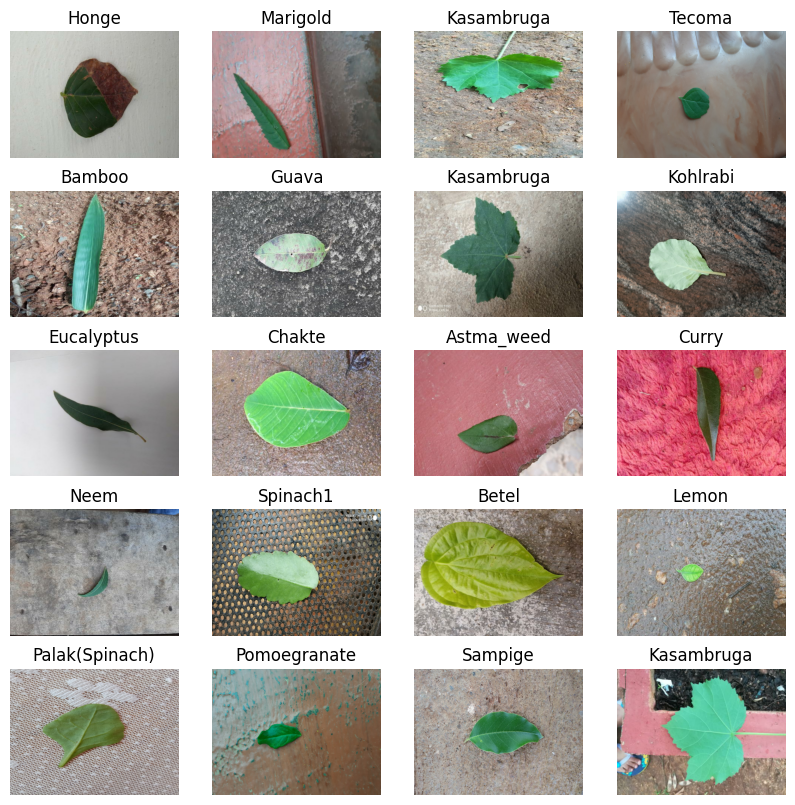

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in leafs_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range (20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(leafs_classes[labels_batch[i]])
        plt.axis('off')

In [ ]:
print(len(leafs_dataset)*train_size)
print(len(leafs_dataset)*test_size)

172.8
21.6


Dividing data in :


*   Training Data ==> 80%
*   Test Data ==>20%
> Validation Data ==> 10% ,
> Test Data = 10%

In [ ]:
leafs_train_dataset = leafs_dataset.take(172)

In [ ]:
leafs_test_dataset = leafs_dataset.skip(172)
len(leafs_test_dataset)

44

In [ ]:
leafs_val_dataset = leafs_test_dataset.take(21)

In [ ]:
leafs_test_dataset = leafs_test_dataset.skip(21)

In [ ]:
def get_dataset(dataset, train_split=0.8, val_split=0.1, test_split = 0.1, shuffle=True, shuffle_size=10000):
  assert(train_split+val_split+test_split) == 1
  ds_size = len(dataset)
  if shuffle:
    ds = ds.shuffle(shuffle.size,seed=12)
  return leafs_train_dataset, leafs_val_dataset, leafs_test_dataset